<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/14_maszyna_wektor%C3%B3w_no%C5%9Bnych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Dane

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data = df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

##Podział na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

##Standaryzacja cech

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Klasyfikator SVM-linear

In [ ]:
from sklearn.svm import SVC

cls = SVC(C=1, kernel='linear')
cls.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
cls_score = cls.score(X_test, y_test)
cls_score

0.9736842105263158

wizualizacja na danych treningowych

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVC: train accuracy: 0.9737')

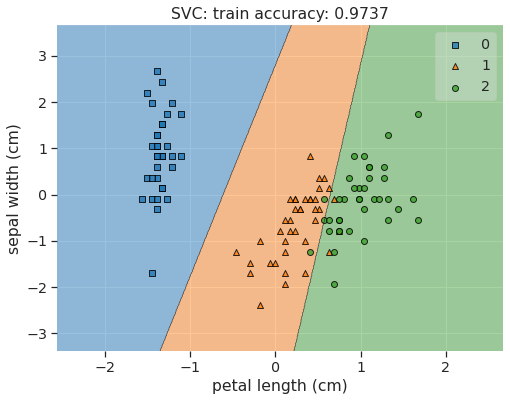

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, cls)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {cls_score:.4f}')

wizualizacja na danych testowych

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVC: train accuracy: 0.9737')

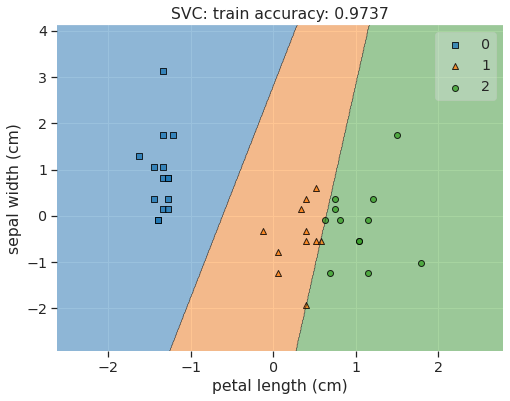

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, cls)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {cls_score:.4f}')

##Klasyfikator SVM - rbf

In [ ]:
cls = SVC(C=1, kernel='rbf')
cls.fit(X_train, y_train)
cls_score = cls.score(X_test, y_test)
cls_score

0.9736842105263158

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVC: train accuracy: 0.9737')

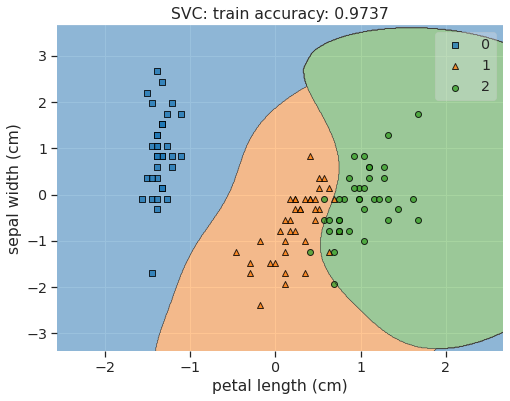

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, cls)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {cls_score:.4f}')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVC: train accuracy: 0.9737')

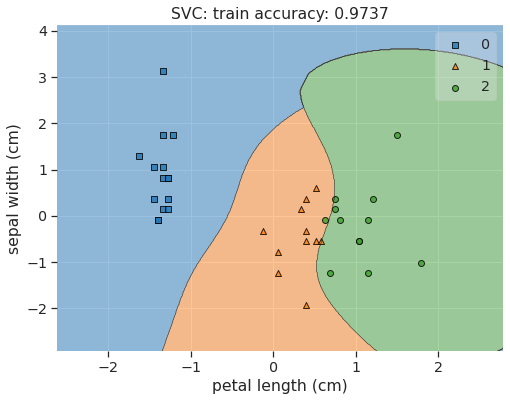

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, cls)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {cls_score:.4f}')